# Regression Analysis with SQL Data Processing

This notebook performs regression analysis on state-level business metrics and customer sentiment data.

## 1. Data Loading and Initial Exploration

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Load the merged dataset
df = pd.read_csv("merged(2).csv")

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (63, 12)

First few rows:
  state  year  store_share  Revenue_state  Operating_income_state  \
0    AZ  2018     0.095541    464807.4841             24684.84076   
1    AZ  2019     0.095541    533729.5223             42416.36943   
2    AZ  2020     0.095541    571780.3185             27722.67516   
3    AZ  2021     0.095541    721056.7834             76905.38217   
4    AZ  2022     0.095541    824966.7516            110866.52870   

   Operating_margin_state  revenue_growth  avg_sentiment  weighted_sentiment  \
0                0.005074             NaN       0.320693            0.122558   
1                0.007593        0.148281       0.163631            0.062534   
2                0.004632        0.071292      -0.063957           -0.024442   
3                0.010190        0.261073      -0.002625           -0.001003   
4                0.012840        0.144108      -0.229025           -0.021881   

   review_count  sentiment_change region  
0            71     

## 2. SQL Data Processing

### 2.1 Create SQLite Database

In [2]:
import sqlite3

# Create in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Write DataFrame to SQL table
df.to_sql("merged", conn, index=False, if_exists="replace")
print(f"Successfully loaded {len(df)} rows into SQLite table")

Successfully loaded 63 rows into SQLite table


### 2.2 Extract Data Using SQL Query

In [3]:
# SQL query to select data for 2018-2022 period, sorted by year and state
query_2018_2022 = """
SELECT
    state,
    year,
    region,
    Revenue_state,
    Operating_income_state,
    Operating_margin_state,
    revenue_growth,
    weighted_sentiment,
    review_count,
    sentiment_change
FROM merged
WHERE year BETWEEN 2018 AND 2022
ORDER BY year, state;
"""

# Execute query and load results
df_reg = pd.read_sql_query(query_2018_2022, conn)
df_reg.columns = df_reg.columns.str.strip()

print(f"Regression dataset shape: {df_reg.shape}")
print("\nFirst few rows:")
print(df_reg.head())

Regression dataset shape: (63, 10)

First few rows:
  state  year region  Revenue_state  Operating_income_state  \
0    AZ  2018   West   464807.48410            24684.840760   
1    CA  2018   West    92961.49682             4936.968153   
2    DE  2018  South   123948.66240             6582.624204   
3    FL  2018  South   836653.47130            44432.713380   
4    ID  2018   West   123948.66240             6582.624204   

   Operating_margin_state  revenue_growth  weighted_sentiment  review_count  \
0                0.005074             NaN            0.122558            71   
1                0.001015             NaN            0.018253            21   
2                0.001353             NaN            0.032886            10   
3                0.009133             NaN            0.059155           167   
4                0.001353             NaN            0.056582            26   

   sentiment_change  
0               NaN  
1               NaN  
2               NaN  
3     

## 3. Regression Models

### 3.1 Model 1A: Revenue Prediction

In [4]:
# Model 1A: Predict state revenue using sentiment metrics
model_1A = ols(
    "Revenue_state ~ weighted_sentiment + review_count + sentiment_change",
    data=df_reg
).fit()

print("Model 1A Summary: Revenue Prediction")
print("="*50)
print(model_1A.summary())

Model 1A Summary: Revenue Prediction
                            OLS Regression Results                            
Dep. Variable:          Revenue_state   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     16.92
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.52e-07
Time:                        17:00:07   Log-Likelihood:                -711.42
No. Observations:                  50   AIC:                             1431.
Df Residuals:                      46   BIC:                             1438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

### 3.2 Model 1B: Operating Income Prediction

In [5]:
# Model 1B: Predict operating income using sentiment metrics
model_1B = ols(
    "Operating_income_state ~ weighted_sentiment + review_count + sentiment_change",
    data=df_reg
).fit()

print("Model 1B Summary: Operating Income Prediction")
print("="*50)
print(model_1B.summary())

Model 1B Summary: Operating Income Prediction
                              OLS Regression Results                              
Dep. Variable:     Operating_income_state   R-squared:                       0.341
Model:                                OLS   Adj. R-squared:                  0.298
Method:                     Least Squares   F-statistic:                     7.926
Date:                    Mon, 01 Dec 2025   Prob (F-statistic):           0.000230
Time:                            17:00:07   Log-Likelihood:                -612.27
No. Observations:                      50   AIC:                             1233.
Df Residuals:                          46   BIC:                             1240.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### 3.3 Model 1C: Operating Margin Prediction

In [6]:
# Model 1C: Predict operating margin using sentiment metrics
model_1C = ols(
    "Operating_margin_state ~ weighted_sentiment + review_count + sentiment_change",
    data=df_reg
).fit()

print("Model 1C Summary: Operating Margin Prediction")
print("="*50)
print(model_1C.summary())

Model 1C Summary: Operating Margin Prediction
                              OLS Regression Results                              
Dep. Variable:     Operating_margin_state   R-squared:                       0.404
Model:                                OLS   Adj. R-squared:                  0.365
Method:                     Least Squares   F-statistic:                     10.37
Date:                    Mon, 01 Dec 2025   Prob (F-statistic):           2.48e-05
Time:                            17:00:07   Log-Likelihood:                 185.55
No. Observations:                      50   AIC:                            -363.1
Df Residuals:                          46   BIC:                            -355.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### 3.4 Model 2: Revenue Growth Prediction

In [7]:
# Model 2: Predict revenue growth using sentiment changes
model_2 = ols(
    "revenue_growth ~ sentiment_change + weighted_sentiment + review_count",
    data=df_reg
).fit()

print("Model 2 Summary: Revenue Growth Prediction")
print("="*50)
print(model_2.summary())

Model 2 Summary: Revenue Growth Prediction
                            OLS Regression Results                            
Dep. Variable:         revenue_growth   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.189
Date:                Mon, 01 Dec 2025   Prob (F-statistic):              0.324
Time:                        17:00:07   Log-Likelihood:                 64.491
No. Observations:                  50   AIC:                            -121.0
Df Residuals:                      46   BIC:                            -113.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## 4. Data Visualizations

### 4.1 Sentiment vs Operating Margin Trend (Interactive Chart)

In [8]:
from pyecharts import options as opts
from pyecharts.charts import Line
from pyecharts.globals import ThemeType

# Aggregate data by year
df_trend = df.groupby('year').agg({
    'avg_sentiment': 'mean',
    'Operating_margin_state': 'mean'
}).reset_index()

# Prepare data for visualization
years = df_trend['year'].astype(str).tolist()
sentiment_trend = df_trend['avg_sentiment'].round(3).tolist()
margin_trend = df_trend['Operating_margin_state'].round(3).tolist()

# Create dual-axis line chart
line = (
    Line(init_opts=opts.InitOpts(
        theme=ThemeType.DARK,
        width="100%",
        height="500px",
        bg_color="transparent"
    ))
    .add_xaxis(years)
    
    # Left Y-axis: Customer Sentiment (green)
    .add_yaxis(
        "Customer Sentiment",
        sentiment_trend,
        yaxis_index=0,
        is_smooth=True,
        symbol="circle",
        symbol_size=10,
        itemstyle_opts=opts.ItemStyleOpts(color="#91cc75"),
        linestyle_opts=opts.LineStyleOpts(width=3),
        label_opts=opts.LabelOpts(is_show=False)
    )
    
    # Right Y-axis: Operating Margin (gold)
    .add_yaxis(
        "Operating Margin",
        margin_trend,
        yaxis_index=1,
        is_smooth=True,
        symbol="circle",
        symbol_size=10,
        itemstyle_opts=opts.ItemStyleOpts(color="#fac858"),
        linestyle_opts=opts.LineStyleOpts(width=3),
        label_opts=opts.LabelOpts(is_show=False)
    )
    
    # Configure right Y-axis
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="Margin",
            type_="value",
            position="right",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#fac858")
            ),
            splitline_opts=opts.SplitLineOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(formatter="{value}")
        )
    )
    
    # Global options
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Sentiment vs Operating Margin Trend",
            subtitle="Dual-axis visualization showing inverse relationship"
        ),
        legend_opts=opts.LegendOpts(pos_bottom="0%"),
        tooltip_opts=opts.TooltipOpts(
            trigger="axis",
            axis_pointer_type="cross"
        ),
        
        # Left Y-axis configuration
        yaxis_opts=opts.AxisOpts(
            name="Sentiment",
            type_="value",
            position="left",
            min_=-0.15,
            max_=0.35,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#91cc75")
            ),
            splitline_opts=opts.SplitLineOpts(
                is_show=True,
                linestyle_opts=opts.LineStyleOpts(opacity=0.2)
            )
        ),
        
        # X-axis configuration
        xaxis_opts=opts.AxisOpts(
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="white")
            )
        )
    )
)

# Render the chart
output_file = "sentiment_margin_trend.html"
line.render(output_file)
print(f"Interactive chart saved to: {output_file}")

# Display in notebook
line.render_notebook()

Interactive chart saved to: sentiment_margin_trend.html


### 4.2 Store Share vs Sentiment Scatter Plot

Scatter plot saved to: static/images/scale_trap_dark_V3.png


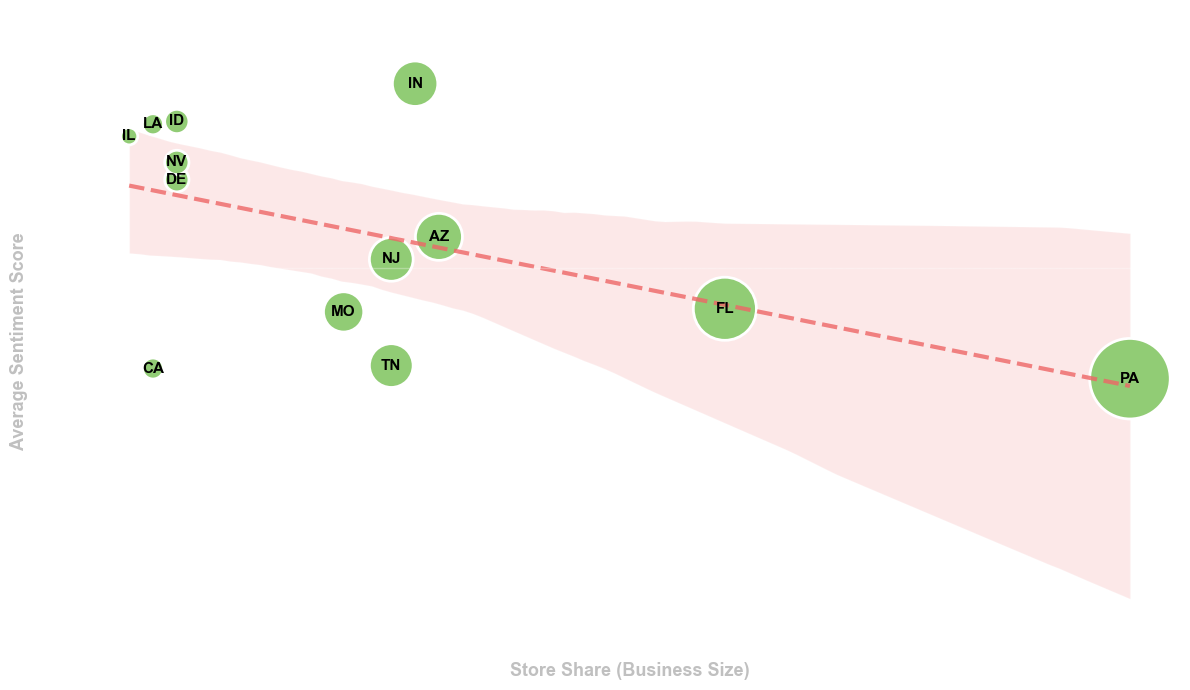

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create output directory if it doesn't exist
os.makedirs('static/images', exist_ok=True)

# Aggregate spatial data by state
spatial_data = df.groupby('state').agg({
    'store_share': 'mean',
    'avg_sentiment': 'mean',
    'Revenue_state': 'sum'
}).reset_index()

# Set dark theme style
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 7))

# Set transparent background
fig.patch.set_facecolor('None')
ax.set_facecolor('None')

# Create bubble scatter plot
# Bubble size is proportional to store share
scatter = ax.scatter(
    spatial_data['store_share'],
    spatial_data['avg_sentiment'],
    s=spatial_data['store_share'] * 12000,  # Scale bubble size
    c='#91cc75',  # Chipotle green
    alpha=1.0,
    edgecolors='white',
    linewidth=2,
    zorder=2
)

# Add regression line
sns.regplot(
    data=spatial_data,
    x='store_share',
    y='avg_sentiment',
    scatter=False,
    ax=ax,
    color='#ee6666',  # Alert red
    line_kws={'linestyle': '--', 'linewidth': 3, 'alpha': 0.8}
)

# Add state labels on bubbles
for i in range(spatial_data.shape[0]):
    ax.text(
        spatial_data.store_share.iloc[i],
        spatial_data.avg_sentiment.iloc[i],
        spatial_data.state.iloc[i],
        color='black',
        fontsize=11,
        fontweight='bold',
        ha='center',
        va='center'
    )

# Beautify axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color((1, 1, 1, 0.3))
ax.spines['left'].set_color((1, 1, 1, 0.3))

# Set labels and title
ax.set_xlabel(
    'Store Share (Business Size)',
    fontsize=13,
    color='silver',
    fontweight='bold',
    labelpad=10
)
ax.set_ylabel(
    'Average Sentiment Score',
    fontsize=13,
    color='silver',
    fontweight='bold',
    labelpad=10
)
ax.set_title(
    'Bigger Markets, Lower Ratings',
    fontsize=20,
    color='white',
    fontweight='bold',
    pad=20
)

# Add reference line at y=0
ax.axhline(0, color='white', linewidth=1, alpha=0.3, linestyle='-')

# Add grid
ax.grid(color='white', linestyle=':', linewidth=0.5, alpha=0.15)

# Save figure
output_path = 'static/images/scale_trap_dark_V3.png'
plt.tight_layout()
plt.savefig(output_path, transparent=True, dpi=300)

print(f"Scatter plot saved to: {output_path}")
plt.show()

## 5. Summary and Insights

### Key Findings:
1. **Model 1A-1C**: Examine the relationship between sentiment metrics and financial performance
2. **Model 2**: Analyzes how sentiment changes affect revenue growth
3. **Visualizations**: Show inverse relationship between market size and customer satisfaction

### Next Steps:
- Export visualizations for reporting
- Conduct deeper analysis on regional differences
- Test additional predictive models